**Github:** [insert link]

# **Clustering NYC 311 Service Requests for Smarter City Management**

**Team 1**: Aastha Surana, Atishay Jain, Kendall Sims, Soham Sarvade

# **Problem Statement**

This project aims to uncover key patterns within NYC’s 311 service request data, helping city officials and businesses make informed decisions about resource allocation. By analyzing complaint trends, we can better understand community needs, improve response strategies, and anticipate emerging issues before they escalate.

* **Community Issue Segmentation** – What are the most common complaints in different neighborhoods? Are certain issues more prevalent in specific areas?
* **Temporal Trends** – How do service requests change over time? Are there seasonal spikes, daily peak hours, or other noticeable trends?
* **Neighborhood Clustering** – Can we group neighborhoods based on the types and frequency of complaints? Identifying clusters could help streamline city services.
* **Emerging Issues** – What new concerns are surfacing that might require proactive intervention? Early detection can help address problems before they become widespread.


# **Motivation**

New York City’s 311 service request system received over 42 million inquiries in 2018 ([NYC Open Data, 2019](https://https://council.nyc.gov/data/311-services/)), covering noise, sanitation, infrastructure, and more. However, due to the sheer volume of requests, identifying and handling recurring issues and emerging concerns remains a challenge for city agencies. Our project leverages unsupervised machine learning techniques—such as clustering and topic modeling—to extract meaningful insights that help stakeholders like city officials proactively address problems of the local people and improve urban management.

# **Business Relevance**
Our findings will have wide-reaching implications:
City Governance: Optimized resource allocation, improved response times, and data-driven policy decisions
Urban Development: Identifies high-complaint zones, influencing real estate trends and infrastructure planning
Private Sector & Utilities: Businesses can assess location-based risks, plan operations, and improve customer service strategies
With predictive analytics reducing inefficiencies by 15-20% ([Harvard Data-Smart City Solutions, 2022](https://www.google.com/url?q=https://datasmart.hks.harvard.edu/news/article/how-can-data-and-analytics-be-used-to-enhance-city-operations-723&sa=D&source=docs&ust=1739680383860911&usg=AOvVaw2oqljbuUOOY1i8aZ3vuR3u)), our project will enhance public services and urban resilience.


# **Related Work**

Data-driven governance is gaining traction worldwide. Studies show that:
Smart city initiatives leveraging AI can enhance city services by up to 30% ([McKinsey & Company, 2018](https://www.mckinsey.com/capabilities/operations/our-insights/smart-cities-digital-solutions-for-a-more-livable-future))
NYC’s 311 data has been analyzed for crime prediction and public health tracking ([National Library of Medicine, 2020](https://pmc.ncbi.nlm.nih.gov/articles/PMC7347128/))
Our approach advances this field by applying cutting-edge clustering techniques to uncover hidden urban patterns.


# **Dataset**

**Data source:** [NYC OpenData](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

**Dataset Size and Features**: The dataset consists of over 28 million records and 41 features. Each record corresponds to a single 311 complaint, and the dataset includes categorical, numerical, textual, and geographic data.


**Columns Description**

Here is a brief description of the columns:

| Column Title                     | Description |
| :-------------------------------- | :----------------------------------------------------------- |
| `unique_key`                      | Unique identifier of a Service Request (SR) in the open data set |
| `created_date`                    | Date SR was created |
| `closed_date`                     | Date SR was closed by responding agency |
| `agency`                          | Acronym of responding City Government Agency |
| `agency_name`                     | Full Agency name of responding City Government Agency |
| `complaint_type`                  | The first level of a hierarchy identifying the topic of the incident or condition. May have a corresponding Descriptor. |
| `descriptor`                      | Further detail on the incident or condition, dependent on Complaint Type. |
| `location_type`                   | Describes the type of location used in the address information |
| `incident_zip`                    | Incident location zip code, provided by geo validation. |
| `incident_address`                | House number of incident address provided by submitter. |
| `street_name`                     | Street name of incident address provided by the submitter |
| `cross_street_1`                  | First Cross street based on the geo validated incident location |
| `cross_street_2`                  | Second Cross Street based on the geo validated incident location |
| `intersection_street_1`           | First intersecting street based on geo validated incident location |
| `intersection_street_2`           | Second intersecting street based on geo validated incident location |
| `address_type`                    | Type of incident location information available. |
| `city`                             | City of the incident location provided by geovalidation. |
| `landmark`                         | If the incident location is identified as a Landmark, the name of the landmark will display here |
| `facility_type`                    | If available, describes the type of city facility associated with the SR |
| `status`                           | Status of SR submitted |
| `due_date`                         | Date when responding agency is expected to update the SR. Based on Complaint Type and internal SLAs. |
| `resolution_description`           | Describes the last action taken on the SR by the responding agency. May describe next or future steps. |
| `resolution_action_updated_date`   | Date when responding agency last updated the SR. |
| `community_board`                  | Provided by geovalidation. |
| `bbl`                              | Borough Block and Lot, provided by geovalidation. Identifies the location of buildings and properties in NYC. |
| `borough`                          | Provided by the submitter and confirmed by geovalidation. |
| `x_coordinate_state_plane`         | Geo validated, X coordinate of the incident location. |
| `y_coordinate_state_plane`         | Geo validated, Y coordinate of the incident location. |
| `open_data_channel_type`           | Indicates how the SR was submitted to 311 (e.g., Phone, Online, Mobile, Other, Unknown). |
| `park_facility_name`               | If the incident location is a Parks Dept facility, the Name of the facility will appear here |
| `park_borough`                     | The borough of the incident if it is a Parks Dept facility |
| `vehicle_type`                     | If the incident is a taxi, describes the type of TLC vehicle. |
| `taxi_company_borough`             | If the incident is identified as a taxi, displays the borough of the taxi company. |
| `taxi_pick_up_location`            | If the incident is identified as a taxi, displays the taxi pick-up location |
| `bridge_highway_name`              | If the incident is identified as a Bridge/Highway, the name will be displayed here. |
| `bridge_highway_direction`         | If the incident is identified as a Bridge/Highway, displays the direction where the issue took place. |
| `road_ramp`                        | If the incident location was Bridge/Highway, differentiates if the issue was on the Road or the Ramp. |
| `bridge_highway_segment`           | Additional information on the section of the Bridge/Highway where the incident took place. |
| `latitude`                         | Geo-based latitude of the incident location |
| `longitude`                        | Geo-based longitude of the incident location |
| `location`                         | Combination of the geo-based latitude & longitude of the incident location |



**Sampling**

We selected 5% of the total dataset (~28 million records) using stratified sampling, ensuring proportional representation from each year. This approach maintains data distribution while optimizing computational efficiency.

**Download and Explore the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read data
df = pd.read_csv('/content/drive/MyDrive/BA_820_Project/311_sample_5percent.csv')
df.head()

<ipython-input-2-d8c5d5428f54>:2: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/BA_820_Project/311_sample_5percent.csv')


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,taxi_pickup_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,year,random_value
0,16931607,2010-06-23 17:08:00 UTC,2010-06-25 12:00:00 UTC,DSNY,A - Manhattan,Other Enforcement,E2A Storage Of Receptacles,Sidewalk,10014,40 GROVE STREET,...,NaN,NaN,NaN,NaN,NaN,40.732744,-74.004492,"(40.73274401333002, -74.00449223913523)",2010,0.005862
1,18542064,2010-08-23 10:39:00 UTC,2010-08-23 12:00:00 UTC,DSNY,Manhattan 03,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10009,15 AVENUE A,...,NaN,NaN,NaN,NaN,NaN,40.722708,-73.985981,"(40.72270841860757, -73.98598055209958)",2010,0.016101
2,18657511,2010-09-10 13:40:00 UTC,2010-09-10 13:40:00 UTC,DSNY,Manhattan 05,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10001,223 WEST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,40.747612,-73.994226,"(40.747612275079405, -73.99422555281097)",2010,0.003375
3,18924573,2010-10-18 13:05:00 UTC,2010-10-18 13:05:00 UTC,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,79 LAIGHT STREET,...,NaN,NaN,NaN,NaN,NaN,40.722209,-74.010722,"(40.72220922690437, -74.010721947246)",2010,0.003891
4,19011590,2010-10-30 11:08:00 UTC,2010-10-30 12:00:00 UTC,DSNY,Manhattan 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10014,140 WEST 10 STREET,...,NaN,NaN,NaN,NaN,NaN,40.734578,-74.000678,"(40.734577594628455, -74.00067836481676)",2010,0.027632


**Removing Redundant and Irrelevant Features for Cleaner Modeling**

In this step, we are removing unnecessary columns from the dataset to simplify analysis and reduce computational overhead.

The columns below were identified as redundant or less relevant for modeling:

1. **Granularity Reduction for Simplified Analysis**

Removed Columns: incident_address, street_name, cross_street_1, cross_street_2, intersection_street_1, intersection_street_2, address_type, landmark

Reasoning: These attributes provide highly granular location details that are not required for our analysis. Instead, we will rely on broader geographic indicators such as ZIP code, latitude, and longitude, which are more practical for modeling and interpretation.

2. **Out-of-Scope Variables**

Removed Columns: resolution_description, resolution_action_updated_date, community_board

Reasoning: These columns pertain to resolution details and governance structures that do not align with the core objectives of our analysis. Since they do not contribute directly to our predictive or exploratory goals, they are excluded to maintain a focused dataset.

3. **High Missing Value Ratio**

Removed Columns: park_facility_name, park_borough, vehicle_type, taxi_company_borough, taxi_pickup_location, bridge_highway_name, bridge_highway_direction, road_map, bridge_highway_segment

Reasoning: These variables contain a significant proportion of missing values, making them unreliable for analysis. Retaining them would introduce noise and potential biases without providing substantial benefits to model performance.

4. **Redundant Spatial Features**

Removed Columns: x_coordinate, y_coordinate, location

Reasoning: These attributes duplicate spatial information that is already captured by latitude and longitude, which are universally recognized for geographic analysis. Removing these columns avoids redundancy and ensures consistency in location-based assessments.


By dropping these columns, we create a cleaner, more focused dataset that prioritizes features with higher relevance to the task, thereby improving efficiency and model interpretability.

In [3]:
# List of columns to drop
columns_to_drop = [
    'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
    'intersection_street_1', 'intersection_street_2', 'address_type', 'landmark',
    'resolution_description', 'resolution_action_updated_date', 'community_board',
    'park_facility_name', 'park_borough', 'vehicle_type', 'taxi_company_borough',
    'taxi_pickup_location', 'bridge_highway_name', 'bridge_highway_direction',
    'road_map', 'bridge_highway_segment',
    'x_coordinate', 'y_coordinate', 'location', 'random_value'
]

# Drop the columns from the DataFrame
df_cleaned_1 = df.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame
df_cleaned_1.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,facility_type,status,due_date,borough,bbl,open_data_channel_type,road_ramp,latitude,longitude,year
0,16931607,2010-06-23 17:08:00 UTC,2010-06-25 12:00:00 UTC,DSNY,A - Manhattan,Other Enforcement,E2A Storage Of Receptacles,Sidewalk,10014,NEW YORK,NaN,Closed,NaN,MANHATTAN,1.005880e+09,PHONE,NaN,40.732744,-74.004492,2010
1,18542064,2010-08-23 10:39:00 UTC,2010-08-23 12:00:00 UTC,DSNY,Manhattan 03,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10009,NEW YORK,DSNY Garage,Closed,NaN,MANHATTAN,1.004290e+09,PHONE,NaN,40.722708,-73.985981,2010
2,18657511,2010-09-10 13:40:00 UTC,2010-09-10 13:40:00 UTC,DSNY,Manhattan 05,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10001,NEW YORK,DSNY Garage,Closed,NaN,MANHATTAN,1.007780e+09,OTHER,NaN,40.747612,-73.994226,2010
3,18924573,2010-10-18 13:05:00 UTC,2010-10-18 13:05:00 UTC,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,NEW YORK,DSNY Garage,Closed,NaN,MANHATTAN,1.002178e+09,PHONE,NaN,40.722209,-74.010722,2010
4,19011590,2010-10-30 11:08:00 UTC,2010-10-30 12:00:00 UTC,DSNY,Manhattan 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10014,NEW YORK,DSNY Garage,Closed,NaN,MANHATTAN,1.006100e+09,PHONE,NaN,40.734578,-74.000678,2010


In [4]:
df_cleaned_1.describe()

,unique_key,bbl,latitude,longitude,year
count,1.350693e+06,1.035524e+06,1.242466e+06,1.242466e+06,1.350693e+06
mean,3.430111e+07,2.747421e+09,4.073177e+01,-7.392365e+01,2.015859e+03
std,1.005058e+07,1.168798e+09,8.721039e-02,8.092541e-02,3.404863e+00
min,1.146694e+07,0.000000e+00,4.049874e+01,-7.425494e+01,2.010000e+03
25%,2.601408e+07,2.028240e+09,4.066785e+01,-7.396587e+01,2.013000e+03
50%,3.429561e+07,3.019100e+09,4.072325e+01,-7.392639e+01,2.016000e+03
75%,4.225207e+07,4.007980e+09,4.081311e+01,-7.387716e+01,2.019000e+03
max,5.245440e+07,6.066008e+09,4.091346e+01,-7.370038e+01,2.021000e+03


In [5]:
df_cleaned_1_info = pd.DataFrame({
    'Column Name': df_cleaned_1.columns,
    'Non-Null Count': df_cleaned_1.notnull().sum(),
    'Null Count': df_cleaned_1.isnull().sum(),
    'Unique Values': df_cleaned_1.nunique(),
    'Data Type': df_cleaned_1.dtypes
})

df_cleaned_1_info.reset_index(drop=True, inplace=True)  # Reset the index to avoid repetition

from IPython.display import display
display(df_cleaned_1_info)

,Column Name,Non-Null Count,Null Count,Unique Values,Data Type
0,unique_key,1350693,0,1350693,int64
1,created_date,1350693,0,1139745,object
2,closed_date,1312834,37859,937592,object
3,agency,1350693,0,30,object
4,agency_name,1350693,0,656,object
5,complaint_type,1350693,0,325,object
6,descriptor,1329403,21290,1486,object
7,location_type,1030299,320394,168,object
8,incident_zip,1279748,70945,852,object
9,city,1266408,84285,417,object


In [6]:
feature = 'facility_type'

# Get all unique values in the 'address_type' column
unique_values = df[feature].unique()

# Count unique values including and excluding NaN
unique_count_including_nan = df[feature].nunique(dropna=False)

# Display the results
print(f"Total unique values (including NaN): {unique_count_including_nan}")
print(f"Unique values in {feature} column:", unique_values)

Total unique values (including NaN): 5
Unique values in facility_type column: [nan 'DSNY Garage' 'Precinct' 'School District' 'School']


# **Exploratory Data Analysis**

In this project, EDA will help uncover trends, anomalies, and patterns in NYC’s 311 service requests. We analyze spatial, temporal, and categorical features to guide preprocessing, feature engineering, and clustering.

**Pairplot**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

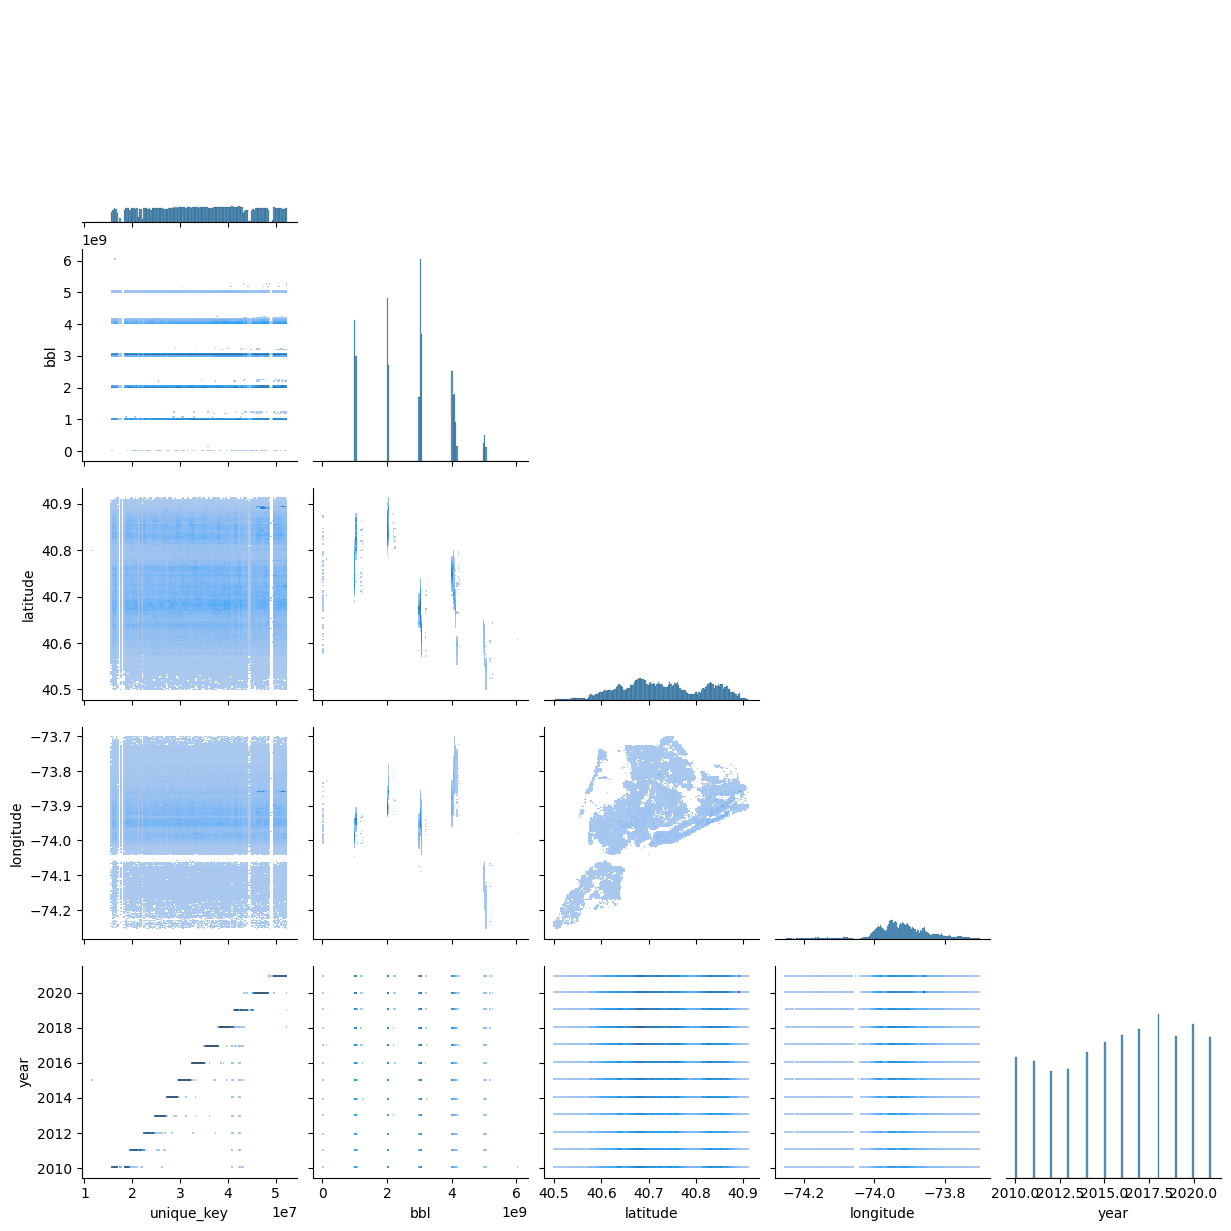

In [7]:
sns.pairplot(df_cleaned_1, kind="hist", corner=True, palette="Set2")

Based on the pairplot, we observe:

1. **No Strong Correlation:** The scatterplots do not show clear linear relationships between most variables, indicating weak or no correlation among them. This suggests that individual features may not be predictive of each other.

2. **Possible Clustering:** Some feature pairs exhibit slight grouping tendencies, hinting that certain types of 311 service requests might cluster together based on specific attributes like location or complaint type.

3. **Varying Distributions:** The density of points varies across different feature combinations, indicating that some service request categories might be more frequent or concentrated in specific conditions than others.


**Complaints by Year**

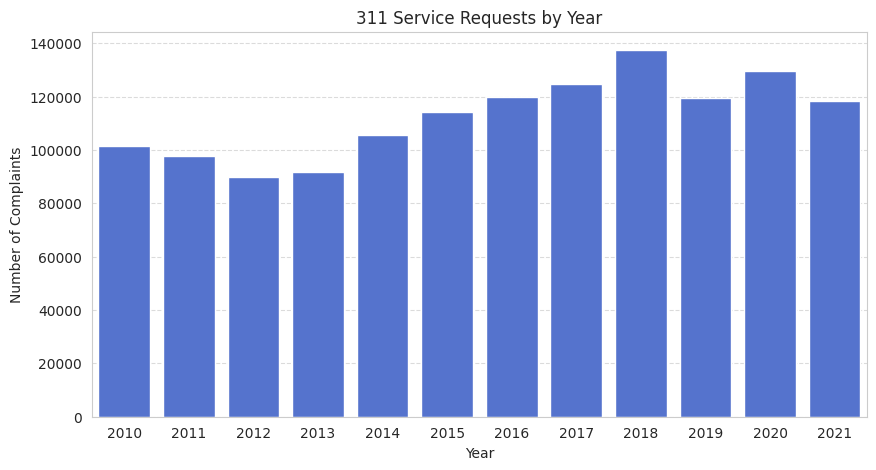

In [8]:
# Ensure created_date is in datetime format
df_cleaned_1['created_date'] = pd.to_datetime(df_cleaned_1['created_date'], errors='coerce')

sns.set_style("whitegrid")

# Number of Complaints Each Year
df_cleaned_1['year'] = df_cleaned_1['created_date'].dt.year
yearly_complaints = df_cleaned_1['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_complaints.index, y=yearly_complaints.values, color="royalblue")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.title("311 Service Requests by Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- 311 complaints increased steadily until 2018-2019, indicating growing reliance on the system.
- The drop in 2020-2021 may be linked to pandemic-related behavioral changes.

**Complaints by Day of week**

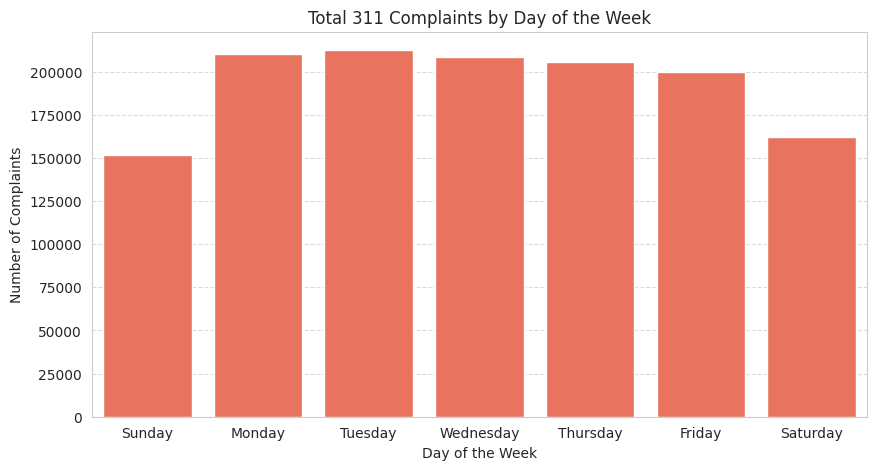

In [9]:
# Number of Complaints Each Day of the Week
df_cleaned_1['day_of_week'] = df_cleaned_1['created_date'].dt.day_name()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekly_complaints = df_cleaned_1['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10,5))
sns.barplot(x=weekly_complaints.index, y=weekly_complaints.values, color="tomato")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Complaints")
plt.title("Total 311 Complaints by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Service requests peak between Monday and Friday, with the highest volume on Tuesday.
- Complaints are often filed during the workweek, potentially driven by business and city agency operations.
- The drop on weekends suggests lower reporting activity rather than an actual decline in issues.


**Complaints by Hour of the Day**

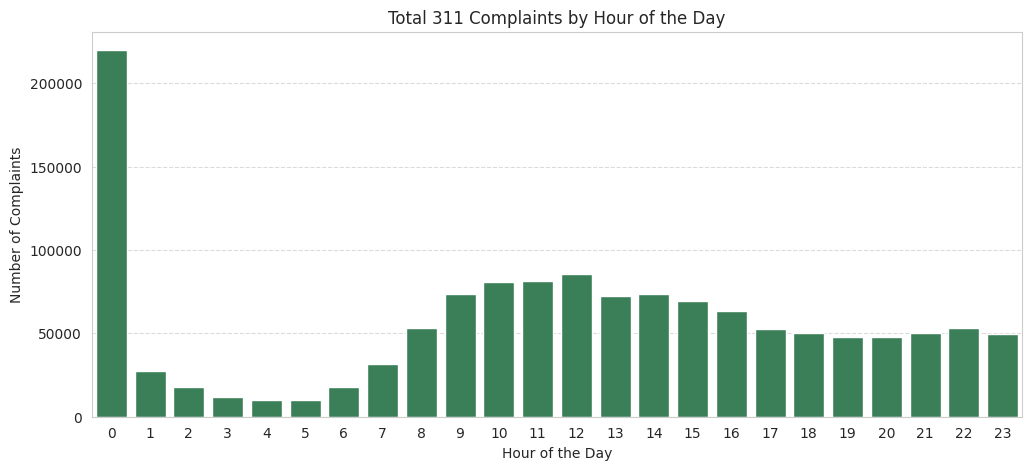

In [10]:
# Number of Complaints by Hour of the Day
df_cleaned_1['hour_of_day'] = df_cleaned_1['created_date'].dt.hour
hourly_complaints = df_cleaned_1['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.barplot(x=hourly_complaints.index, y=hourly_complaints.values, color="seagreen")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Complaints")
plt.title("Total 311 Complaints by Hour of the Day")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- There is a sharp spike in complaints at midnight, likely due to noise complaints.
- Complaint volume remains low in the early morning hours but steadily increases throughout the day.
- Peak reporting occurs between late morning and early afternoon.
- Understanding these patterns can help city agencies optimize response times and resource allocation.


**Mode of Complaint**

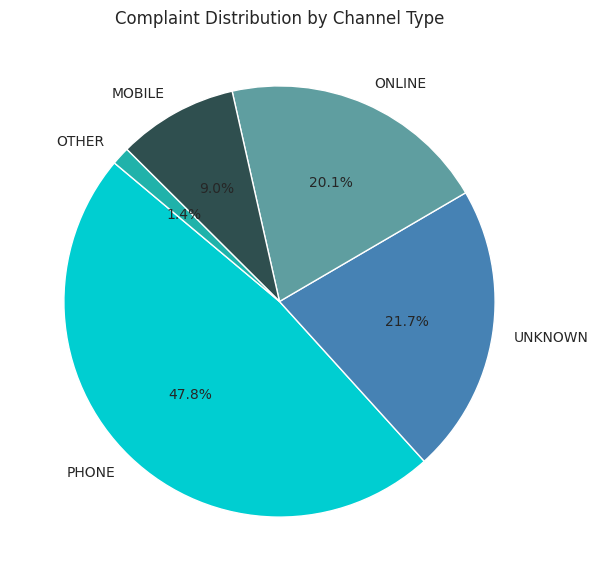

In [11]:
# Complaint Channel Type Distribution (Pie Chart)
plt.figure(figsize=(7,7))
channel_counts = df_cleaned_1['open_data_channel_type'].value_counts()
colors = ["#00CED1", "#4682B4", "#5F9EA0", "#2F4F4F", "#20B2AA"]  # Cyan, Steel Blue, Cadet Blue, Dark Slate Gray, Light Sea Green

plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={"edgecolor": "white"})
plt.title("Complaint Distribution by Channel Type")
plt.show()

- The majority of complaints are reported via phone (49.1%), followed by online platforms (21.4%).
- The high reliance on phone reporting suggests accessibility issues with digital alternatives.
- Increasing mobile and online adoption could enhance efficiency and streamline service request processing.


**Top 10 Complaint Types**

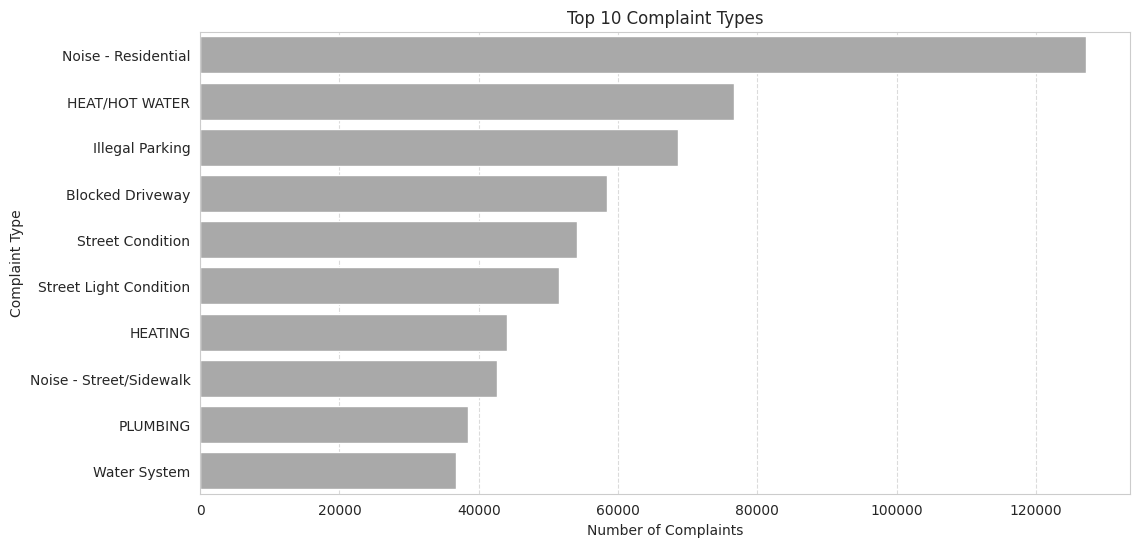

In [12]:
plt.figure(figsize=(12,6))

top_10_complaints = df_cleaned_1['complaint_type'].value_counts().nlargest(10).index

sns.countplot(y=df_cleaned_1[df_cleaned_1['complaint_type'].isin(top_10_complaints)]['complaint_type'],
              order=top_10_complaints, color="#a9a9a9")

plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")
plt.title("Top 10 Complaint Types")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

- Noise complaints (residential and street) dominate the 311 system.
- Other major concerns include heat/hot water issues, illegal parking, and blocked driveways.
- These recurring issues highlight key urban challenges that demand targeted policy interventions.
- High-density residential areas may require better noise control and heating regulations.

**Top 10 Agencies Handling Complaints**

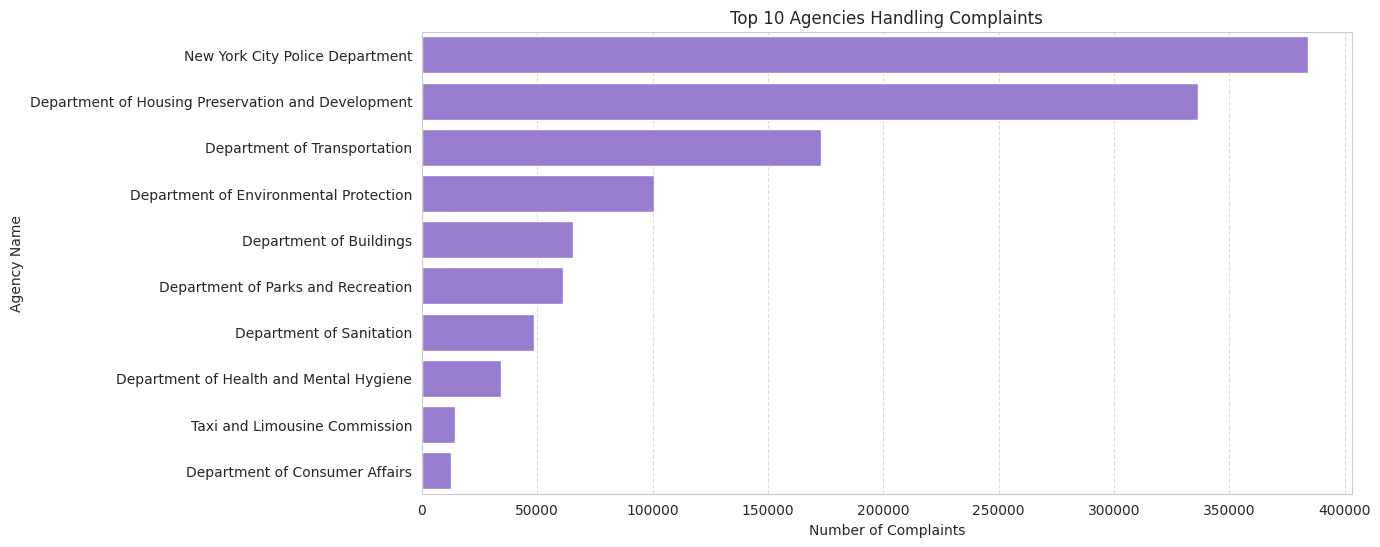

In [13]:
plt.figure(figsize=(12,6))

# Get top 10 agencies handling complaints
top_10_agencies = df_cleaned_1['agency_name'].value_counts().nlargest(10).index

sns.countplot(y=df_cleaned_1[df_cleaned_1['agency_name'].isin(top_10_agencies)]['agency_name'],
              order=top_10_agencies, color="#9370DB")
plt.xlabel("Number of Complaints")
plt.ylabel("Agency Name")
plt.title("Top 10 Agencies Handling Complaints")
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Gridlines only on x-axis for readability
plt.show()

- The NYPD receives the highest volume of complaints, followed by Housing Preservation and Development (HPD) and the Department of Transportation.
- The focus on law enforcement, housing, and infrastructure suggests these are the most pressing urban concerns.
- Clustering complaints by agency could help improve inter-departmental coordination and efficiency.


**Complaints by Borough**

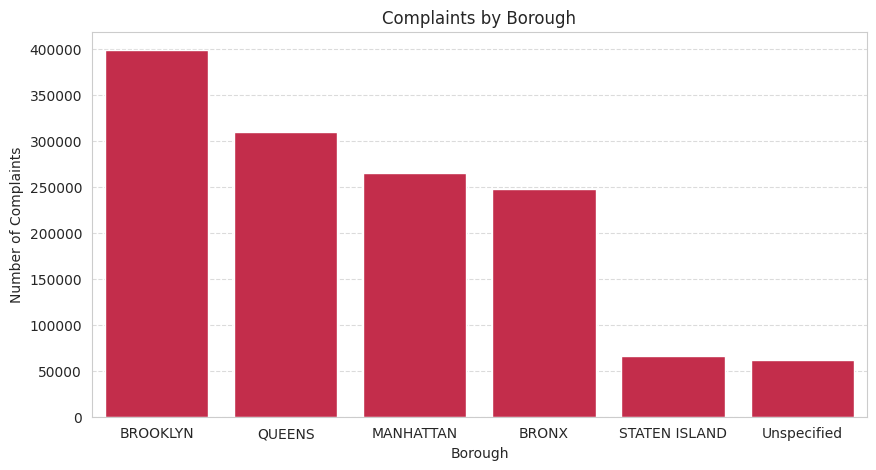

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_cleaned_1['borough'],
              order=df_cleaned_1['borough'].value_counts().index,
              color="#DC143C")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.title("Complaints by Borough")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Brooklyn and Queens generate the highest number of complaints, reflecting their large populations and infrastructure challenges.
- Manhattan and the Bronx also report significant complaint volumes.
- Staten Island and the "Unspecified" category have significantly lower volumes, which may indicate gaps in reporting or data collection discrepancies.

**Geospatial Analysis of Complaints**

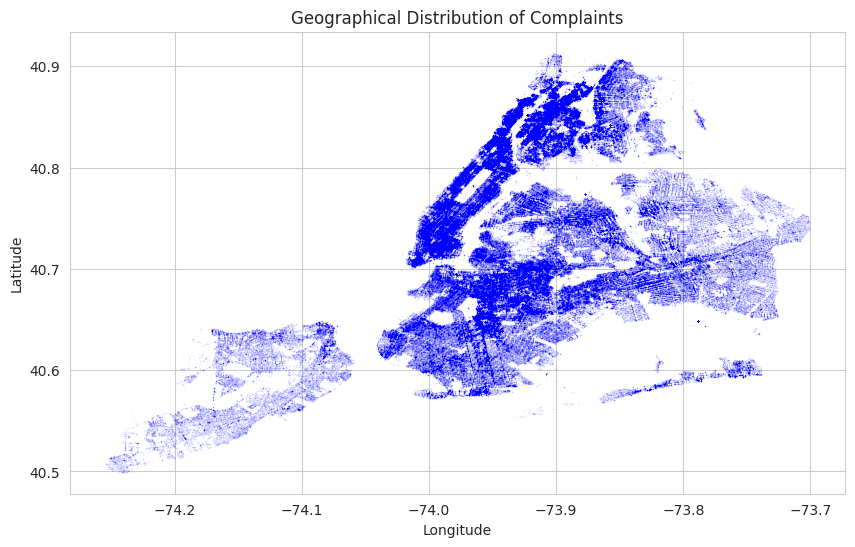

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned_1['longitude'], y=df_cleaned_1['latitude'],
                alpha=0.03, color="blue", s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Complaints")
plt.show()

- Complaints are concentrated in densely populated areas, particularly in Manhattan and Brooklyn.
- Spatial clustering can reveal high-complaint zones, helping city officials prioritize interventions.
- Certain areas may require targeted policies or improved resource allocation to address persistent issues.

**Complaints Over Time (Time Series Plot)**

<ipython-input-16-4871bfe2f59e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned_1.set_index('created_date').resample('M').size().plot()


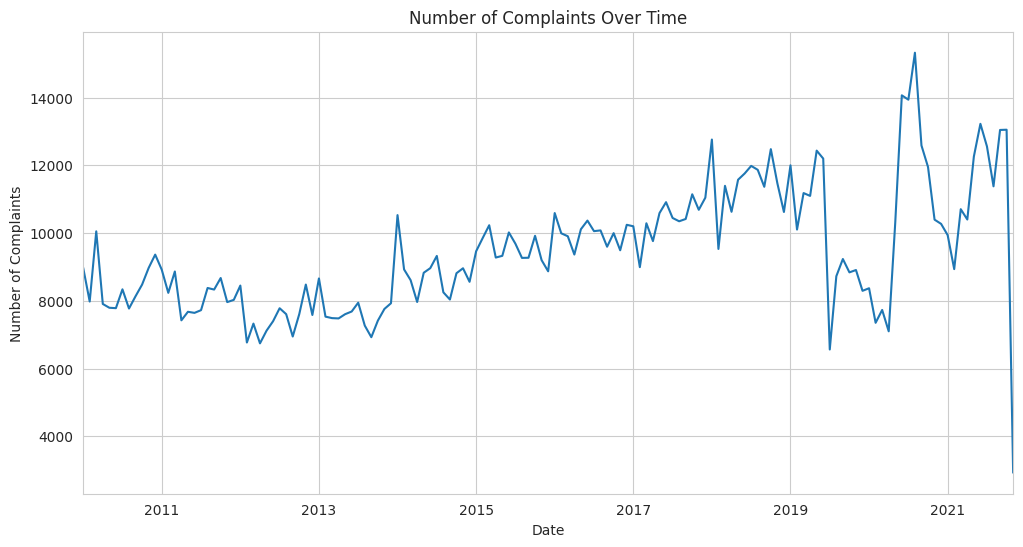

In [16]:
df_cleaned_1['created_date'] = pd.to_datetime(df_cleaned_1['created_date'])

plt.figure(figsize=(12,6))
df_cleaned_1.set_index('created_date').resample('M').size().plot()
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.title("Number of Complaints Over Time")
plt.show()

- Complaint trends show fluctuations with periodic spikes, indicating seasonal variations or policy changes impacting service requests.
- Identifying patterns in these fluctuations can help predict future demand for city services.
- Predictive analytics could assist in proactive urban planning and response strategies.

**Resolution Time**

<ipython-input-17-ae5e6ed3bf07>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_1['resolution_time'] = (df_cleaned_1['closed_date'] - df_cleaned_1['created_date']).dt.total_seconds() / 3600


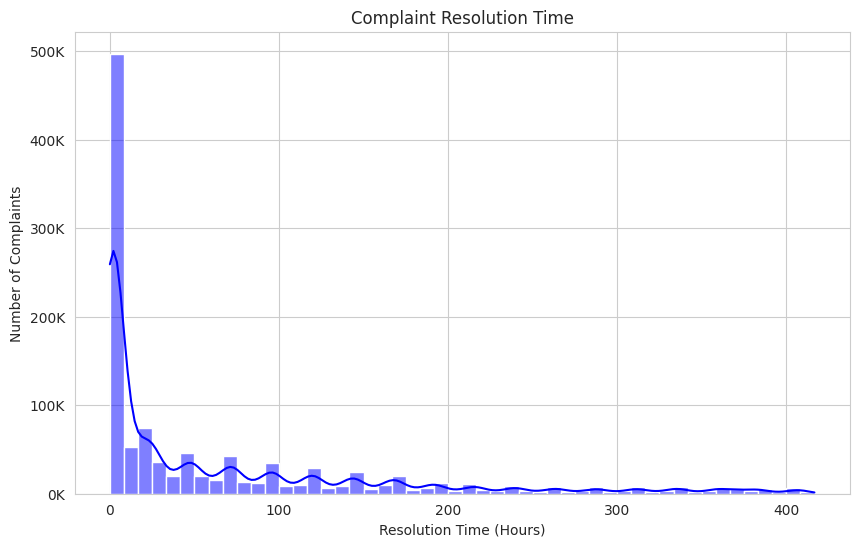

In [17]:
# Ensure datetime format
df_cleaned_1['created_date'] = pd.to_datetime(df_cleaned_1['created_date'], errors='coerce')
df_cleaned_1['closed_date'] = pd.to_datetime(df_cleaned_1['closed_date'], errors='coerce')

# Drop rows where closed_date is null (i.e., unresolved requests)
df_cleaned_1 = df_cleaned_1.dropna(subset=['closed_date'])

# Calculate resolution time in hours
df_cleaned_1['resolution_time'] = (df_cleaned_1['closed_date'] - df_cleaned_1['created_date']).dt.total_seconds() / 3600

# Drop negative resolution times
df_cleaned_1 = df_cleaned_1[df_cleaned_1['resolution_time'] >= 0]

# Remove outliers using the Interquartile Range (IQR) method
Q1, Q3 = df_cleaned_1['resolution_time'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

df_cleaned_1 = df_cleaned_1[(df_cleaned_1['resolution_time'] >= lower_bound) &
                             (df_cleaned_1['resolution_time'] <= upper_bound)]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_1['resolution_time'], bins=50, kde=True, color='blue')

# Adjust y-axis labels to be in '000
plt.ylabel("Number of Complaints")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1_000)}K'))

plt.xlabel("Resolution Time (Hours)")
plt.title("Complaint Resolution Time")
plt.show()

- Most complaints are resolved within a short time, but a long tail in resolution times indicates inefficiencies in addressing certain cases.
- Certain complaint types may take disproportionately longer to resolve, affecting resident satisfaction.
- Understanding which complaints have prolonged resolution times can help improve service delivery and accountability.

# **Preprocessing of dataset**

In [18]:
df_cleaned_1.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,...,borough,bbl,open_data_channel_type,road_ramp,latitude,longitude,year,day_of_week,hour_of_day,resolution_time
0,16931607,2010-06-23 17:08:00+00:00,2010-06-25 12:00:00+00:00,DSNY,A - Manhattan,Other Enforcement,E2A Storage Of Receptacles,Sidewalk,10014,NEW YORK,...,MANHATTAN,1.005880e+09,PHONE,NaN,40.732744,-74.004492,2010,Wednesday,17,42.866667
1,18542064,2010-08-23 10:39:00+00:00,2010-08-23 12:00:00+00:00,DSNY,Manhattan 03,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10009,NEW YORK,...,MANHATTAN,1.004290e+09,PHONE,NaN,40.722708,-73.985981,2010,Monday,10,1.350000
2,18657511,2010-09-10 13:40:00+00:00,2010-09-10 13:40:00+00:00,DSNY,Manhattan 05,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10001,NEW YORK,...,MANHATTAN,1.007780e+09,OTHER,NaN,40.747612,-73.994226,2010,Friday,13,0.000000
3,18924573,2010-10-18 13:05:00+00:00,2010-10-18 13:05:00+00:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,NEW YORK,...,MANHATTAN,1.002178e+09,PHONE,NaN,40.722209,-74.010722,2010,Monday,13,0.000000
4,19011590,2010-10-30 11:08:00+00:00,2010-10-30 12:00:00+00:00,DSNY,Manhattan 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10014,NEW YORK,...,MANHATTAN,1.006100e+09,PHONE,NaN,40.734578,-74.000678,2010,Saturday,11,0.866667


In [19]:
# Fill Missing Values and Replace NaaN Values
df_cleaned_1['created_date'] = pd.to_datetime(df_cleaned_1['created_date'], errors='coerce')
df_cleaned_1['closed_date'] = pd.to_datetime(df_cleaned_1['closed_date'], errors='coerce')

# descriptor
df_cleaned_1['descriptor'].fillna(df_cleaned_1['descriptor'].mode()[0], inplace=True)

# location type
df_cleaned_1['location_type'].fillna(df_cleaned_1['location_type'].mode()[0], inplace=True)

# incident zip
df_cleaned_1['incident_zip'].fillna(df_cleaned_1['incident_zip'].mode()[0], inplace=True)

# city
df_cleaned_1['city'].fillna(df_cleaned_1['city'].mode()[0], inplace=True)

# facility type
df_cleaned_1['facility_type'].fillna(df_cleaned_1['facility_type'].mode()[0], inplace=True)

# status
df_cleaned_1['status'].fillna(df_cleaned_1['status'].mode()[0], inplace=True)

# due date
df_cleaned_1['due_date'].fillna(method='bfill', inplace=True)
df_cleaned_1['due_date'] = df_cleaned_1['due_date'].fillna(method='ffill')

# borough
df_cleaned_1['borough'].fillna(df_cleaned_1['borough'].mode()[0], inplace=True)

# bbl
df_cleaned_1['bbl'].fillna(df_cleaned_1['bbl'].mode()[0], inplace=True)

# open data channel type
df_cleaned_1['open_data_channel_type'].fillna(df_cleaned_1['open_data_channel_type'].mode()[0], inplace=True)

# road ramp
df_cleaned_1['road_ramp'].fillna(df_cleaned_1['road_ramp'].mode()[0], inplace=True)

# lat
df_cleaned_1['latitude'].fillna(df_cleaned_1['latitude'].median(), inplace=True)

# long
df_cleaned_1['longitude'].fillna(df_cleaned_1['longitude'].median(), inplace=True)

# year
df_cleaned_1['year'].fillna(df_cleaned_1['year'].mode()[0], inplace=True)

# resolution time
df_cleaned_1['resolution_time'].fillna(df_cleaned_1['resolution_time'].median(), inplace=True)

<ipython-input-19-419d97b67eec>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned_1['descriptor'].fillna(df_cleaned_1['descriptor'].mode()[0], inplace=True)
<ipython-input-19-419d97b67eec>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [20]:
# Fixing syntax
df_cleaned_1['agency'] = df_cleaned_1['agency'].replace('MAYORâ€™S OFFICE OF SPECIAL ENFORCEMENT', 'Mayors Office of Special Enforcement')

# Ensuring all words have the correct capitalization
df_cleaned_1 = df_cleaned_1.applymap(lambda x: x.title() if isinstance(x, str) else x)
df_cleaned_1['agency'] = df_cleaned_1['agency'].str.upper()
df_cleaned_1

<ipython-input-20-95bcedd78433>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned_1 = df_cleaned_1.applymap(lambda x: x.title() if isinstance(x, str) else x)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,...,borough,bbl,open_data_channel_type,road_ramp,latitude,longitude,year,day_of_week,hour_of_day,resolution_time
0,16931607,2010-06-23 17:08:00+00:00,2010-06-25 12:00:00+00:00,DSNY,A - Manhattan,Other Enforcement,E2A Storage Of Receptacles,Sidewalk,10014,New York,...,Manhattan,1.005880e+09,Phone,Roadway,40.732744,-74.004492,2010,Wednesday,17,42.866667
1,18542064,2010-08-23 10:39:00+00:00,2010-08-23 12:00:00+00:00,DSNY,Manhattan 03,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10009,New York,...,Manhattan,1.004290e+09,Phone,Roadway,40.722708,-73.985981,2010,Monday,10,1.350000
2,18657511,2010-09-10 13:40:00+00:00,2010-09-10 13:40:00+00:00,DSNY,Manhattan 05,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10001,New York,...,Manhattan,1.007780e+09,Other,Roadway,40.747612,-73.994226,2010,Friday,13,0.000000
3,18924573,2010-10-18 13:05:00+00:00,2010-10-18 13:05:00+00:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,New York,...,Manhattan,1.002178e+09,Phone,Roadway,40.722209,-74.010722,2010,Monday,13,0.000000
4,19011590,2010-10-30 11:08:00+00:00,2010-10-30 12:00:00+00:00,DSNY,Manhattan 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10014,New York,...,Manhattan,1.006100e+09,Phone,Roadway,40.734578,-74.000678,2010,Saturday,11,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350687,29473187,2014-12-10 00:00:00+00:00,2014-12-20 00:00:00+00:00,HPD,Department Of Housing Preservation And Develop...,Water Leak,Heavy Flow,Residential Building,10453.0,Bronx,...,Bronx,2.031630e+09,Phone,Roadway,40.857115,-73.901315,2014,Wednesday,0,240.000000
1350688,29550678,2014-12-21 00:00:00+00:00,2014-12-24 00:00:00+00:00,HPD,Department Of Housing Preservation And Develop...,Heat/Hot Water,Apartment Only,Residential Building,10458.0,Bronx,...,Bronx,2.030240e+09,Phone,Roadway,40.857332,-73.894898,2014,Sunday,0,72.000000
1350689,29574082,2014-12-24 00:00:00+00:00,2014-12-28 00:00:00+00:00,HPD,Department Of Housing Preservation And Develop...,Heat/Hot Water,Entire Building,Residential Building,10453.0,Bronx,...,Bronx,2.032210e+09,Online,Roadway,40.855415,-73.913565,2014,Wednesday,0,96.000000
1350691,29509259,2014-12-14 00:00:00+00:00,2014-12-15 00:00:00+00:00,HPD,Department Of Housing Preservation And Develop...,Heat/Hot Water,Apartment Only,Residential Building,10467.0,Bronx,...,Bronx,2.033520e+09,Phone,Roadway,40.877557,-73.872945,2014,Sunday,0,24.000000


In [21]:
# Look into why resolution time is zero for some cases
resolution_zero = df_cleaned_1[df_cleaned_1['resolution_time'] == 0]
resolution_zero

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,...,borough,bbl,open_data_channel_type,road_ramp,latitude,longitude,year,day_of_week,hour_of_day,resolution_time
2,18657511,2010-09-10 13:40:00+00:00,2010-09-10 13:40:00+00:00,DSNY,Manhattan 05,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10001,New York,...,Manhattan,1.007780e+09,Other,Roadway,40.747612,-73.994226,2010,Friday,13,0.0
3,18924573,2010-10-18 13:05:00+00:00,2010-10-18 13:05:00+00:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,New York,...,Manhattan,1.002178e+09,Phone,Roadway,40.722209,-74.010722,2010,Monday,13,0.0
123,16317140,2010-03-27 00:00:00+00:00,2010-03-27 00:00:00+00:00,HPD,Department Of Housing Preservation And Develop...,Heating,Heat,Residential Building,10025,New York,...,Unspecified,1.012260e+09,Unknown,Roadway,40.793113,-73.968157,2010,Saturday,0,0.0
146,16079280,2010-02-24 10:11:46+00:00,2010-02-24 10:11:46+00:00,DOB,Department Of Buildings,General Construction/Plumbing,Working Contrary To Stop Work Order,Residential Building,10016,New York,...,Manhattan,1.009390e+09,Unknown,Roadway,40.743710,-73.975424,2010,Wednesday,10,0.0
188,18425601,2010-08-05 10:24:00+00:00,2010-08-05 10:24:00+00:00,DOT,Department Of Transportation,Street Light Condition,Street Light Out,Residential Building,11226.0,Brooklyn,...,Manhattan,2.048330e+09,Unknown,Roadway,40.723084,-73.926181,2010,Thursday,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350555,28275369,2014-06-17 10:01:21+00:00,2014-06-17 10:01:21+00:00,DOT,Department Of Transportation,Street Condition,Pothole,Residential Building,11234.0,Brooklyn,...,Brooklyn,2.048330e+09,Unknown,Roadway,40.620404,-73.910555,2014,Tuesday,10,0.0
1350557,28413183,2014-07-06 16:10:27+00:00,2014-07-06 16:10:27+00:00,DOT,Department Of Transportation,Street Condition,Pothole,Residential Building,11209.0,Brooklyn,...,Brooklyn,3.058710e+09,Unknown,Roadway,40.635203,-74.027905,2014,Sunday,16,0.0
1350594,27409242,2014-02-11 10:10:00+00:00,2014-02-11 10:10:00+00:00,DOT,Department Of Transportation,Street Light Condition,Street Light Out,Residential Building,11226.0,Brooklyn,...,Queens,2.048330e+09,Unknown,Roadway,40.723084,-73.926181,2014,Tuesday,10,0.0
1350597,28775839,2014-08-28 12:00:00+00:00,2014-08-28 12:00:00+00:00,DSNY,Department Of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11377.0,Woodside,...,Queens,4.024240e+09,Phone,Roadway,40.735696,-73.897800,2014,Thursday,12,0.0


We noticed that some cases have a resolution time of zero, and we decided to look into why this might be occurring. For these special cases, the created date and closed date are the same, so this request was most likely resolved right away- no paperwork or follow-up was needed. For this reason, we decided to keep these rows in the dataset because it provides valuable insight into our data.

## **Featuring Numerical Columns**



Our dataset is largely categorical, with few numerical features. Since most unsupervised learning algorithms require numerical data and handling categorical data directly is beyond the scope of our course we transformed categorical features and derived numerical features. This allowed us to generate meaningful features for our model.

This code calculates zip_complaint_density representing the proportion of complaints originating from each **ZIP code**. It helps with community issue segmentation by identifying areas with high complaint volumes and supports neighborhood clustering by grouping locations based on complaint density. Additionally it aids in detecting emerging issues by highlighting ZIP codes experiencing rising complaint trends.

In [22]:
#This column counts the number of complaints and groups it by zip code
# Count the number of complaints per ZIP code
zip_complaint_counts = df_cleaned_1['incident_zip'].value_counts(normalize=True)  # Normalize to get proportions

# Map these frequencies back to the dataset
df_cleaned_1['zip_complaint_density'] = df_cleaned_1['incident_zip'].map(zip_complaint_counts)

This code calculates borough_complaint_density representing the proportion of complaints from each borough. It helps with community issue segmentation by identifying boroughs with high complaint volumes and supports neighborhood clustering by grouping boroughs based on complaint density. It also aids in detecting emerging issues by revealing boroughs experiencing a surge in complaints over time.

In [23]:
#This column counts the number of complaints and groups it by borough
# Count the number of complaints per borough
borough_complaint_counts = df_cleaned_1['borough'].value_counts(normalize=True)

# Map the normalized counts
df_cleaned_1['borough_complaint_density'] = df_cleaned_1['borough'].map(borough_complaint_counts)


This code calculates the relative frequency of each complaint type and adds it back as complaint_type_score showing how common each issue is. This helps in Community issue segmentation by identifying prevalent complaints and supports emerging issues detection by highlighting shifts in patterns, enabling better resource allocation and proactive responses.

In [24]:
#It measures the types of various complaints and gives its frequency
# Compute complaint type frequency
complaint_type_counts = df_cleaned_1['complaint_type'].value_counts(normalize=True)

# Map back to dataset
df_cleaned_1['complaint_type_score'] = df_cleaned_1['complaint_type'].map(complaint_type_counts)

In [25]:
df_cleaned_1['created_date'] = pd.to_datetime(df_cleaned_1['created_date'], errors='coerce').dt.tz_localize(None)
df_cleaned_1['due_date'] = pd.to_datetime(df_cleaned_1['due_date'], errors='coerce').dt.tz_localize(None)
df_cleaned_1['closed_date'] = pd.to_datetime(df_cleaned_1['closed_date'], errors='coerce').dt.tz_localize(None)
df_cleaned_1['request_age_days'] = (
    pd.Timestamp.today().normalize() - df_cleaned_1['created_date'].dt.normalize()
).dt.days

<ipython-input-25-2f0739c92b04>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned_1['due_date'] = pd.to_datetime(df_cleaned_1['due_date'], errors='coerce').dt.tz_localize(None)


This code calculates resolution_time which is the time taken to resolve a complaint in hours, by finding the difference between closed_date and created_date. It helps to analyze temporal trends by identifying response efficiency, peak delays, and seasonal variations. It also supports emerging issues by detecting prolonged resolution times, which may indicate service inefficiencies or resource constraints.

In [26]:
#resolution time calculation
# Convert closed_date to datetime
df_cleaned_1['closed_date'] = pd.to_datetime(df_cleaned_1['closed_date'], errors='coerce')

# Calculate resolution time in hours
df_cleaned_1['resolution_time'] = (df_cleaned_1['closed_date'] - df_cleaned_1['created_date']).dt.total_seconds() / 3600

# Round resolution time to two decimal places
df_cleaned_1['resolution_time'] = df_cleaned_1['resolution_time'].round(2)

This code calculates response_delay_hours measuring how early or late a complaint was resolved relative to its due_date. A positive value indicates a delay while a negative value means early resolution. This feature helps analyze temporal trends by identifying delays in service response and detecting inefficiencies. It also supports emerging issues by highlighting worsening delays which may signal resource shortages or operational bottlenecks.

In [27]:
#response delay hours calculation
df_cleaned_1['due_date'] = pd.to_datetime(df_cleaned_1['due_date'], errors='coerce')

# Compute delay (positive if late, negative if early)
df_cleaned_1['response_delay_hours'] = (df_cleaned_1['closed_date'] - df_cleaned_1['due_date']).dt.total_seconds() / 3600
df_cleaned_1['response_delay_hours'] = df_cleaned_1['response_delay_hours'].round(2)

This code calculates submission_importance, representing the proportion of complaints received through each submission type. It helps analyze community issue segmentation by identifying the most commonly used reporting channels in different neighborhoods. Additionally it supports emerging issues by detecting shifts in submission patterns which may indicate changing public preferences or accessibility concerns in reporting complaints.

In [28]:
# Compute the proportion of complaints from each submission type
channel_counts = df_cleaned_1['open_data_channel_type'].value_counts(normalize=True)

# Assign a weight to each record based on its submission type
df_cleaned_1['submission_importance'] = df_cleaned_1['open_data_channel_type'].map(channel_counts)

In [29]:
# Standardize all numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['unique_key', 'latitude', 'longitude', 'resolution_time', 'year', 'zip_complaint_density', 'borough_complaint_density', 'complaint_type_score',
                  'request_age_days', 'response_delay_hours', 'submission_importance' ]
scaler = StandardScaler()
df_cleaned_1[numerical_cols] = scaler.fit_transform(df_cleaned_1[numerical_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [30]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['latitude', 'longitude', 'resolution_time', 'year']
scaler = StandardScaler()
df_cleaned_1[numerical_cols] = scaler.fit_transform(df_cleaned_1[numerical_cols])
df_cleaned_1.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,...,year,day_of_week,hour_of_day,resolution_time,zip_complaint_density,borough_complaint_density,complaint_type_score,request_age_days,response_delay_hours,submission_importance
0,-1.771279,2010-06-23 17:08:00,2010-06-25 12:00:00,DSNY,A - Manhattan,Other Enforcement,E2A Storage Of Receptacles,Sidewalk,10014,New York,...,-1.771652,Wednesday,17,-0.232003,-0.396132,-0.327018,-0.989625,1.773172,NaN,0.995750
1,-1.610041,2010-08-23 10:39:00,2010-08-23 12:00:00,DSNY,Manhattan 03,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10009,New York,...,-1.771652,Monday,10,-0.668093,-0.350902,-0.327018,-0.672522,1.723837,NaN,0.995750
2,-1.598482,2010-09-10 13:40:00,2010-09-10 13:40:00,DSNY,Manhattan 05,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10001,New York,...,-1.771652,Friday,13,-0.682272,-0.409480,-0.327018,-0.672522,1.709279,NaN,-2.011135
3,-1.571744,2010-10-18 13:05:00,2010-10-18 13:05:00,DSNY,Manhattan 01,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10013,New York,...,-1.771652,Monday,13,-0.682272,-0.396409,-0.327018,-0.672522,1.678546,NaN,0.995750
4,-1.563032,2010-10-30 11:08:00,2010-10-30 12:00:00,DSNY,Manhattan 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10014,New York,...,-1.771652,Saturday,11,-0.673134,-0.396132,-0.327018,-0.672522,1.668841,NaN,0.995750


In [31]:
df_cleaned_1.drop(columns=['response_delay_hours'], inplace=True)
numerical_features = df_cleaned_1.select_dtypes(include=['number']).columns
df_numerical = df_cleaned_1[numerical_features]

# **Model Fitting**

Completing data preprocessing and ensuring quality by handling missing values and scaling numerical features, we apply Principal Component Analysis (PCA) to explore dimensionality reduction before proceeding with K-Means clustering to identify natural groupings within the data. After this we will estimate the optimal number of clusters using the elbow method, and analyze these clusters based on geographic and categorical complaint trends. In the next phase, we will refine clustering techniques and analyze textual data.



In [32]:
from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = PCA(1)

#fit the data
model.fit(df_numerical)

# transform the data
transformed_data = model.transform(df_numerical)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(transformed_data_df.shape[1])]

transformed_data_df

,PC1
0,-1.574877e+09
1,-1.576467e+09
2,-1.572977e+09
3,-1.578579e+09
4,-1.574657e+09
...,...
1122359,-5.491267e+08
1122360,-5.505167e+08
1122361,-5.485467e+08
1122362,-5.472367e+08


Our analysis resulted in a single principal component (PC1), indicating strong feature correlations or a dominant pattern in the data. Since PCA didn’t provide effective dimensionality reduction for clustering, we will proceed with K-Means.

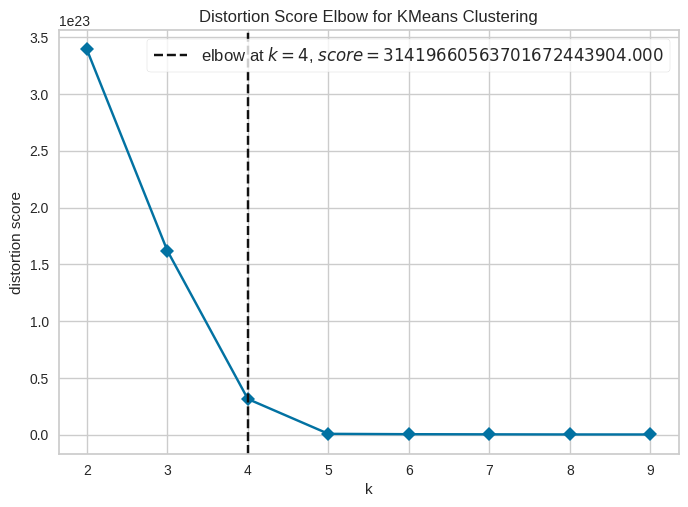

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(df_numerical)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=4, random_state=42)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_numerical)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

n_clusters = 4

Z = linkage(df_numerical, 'ward')
df_numerical['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)

_ = dendrogram(Z)

score = silhouette_score(ds_numeric , labels)
print("Silhouette Score: ", score)

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score

df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])
df_numerical_without_labels = df_numerical.drop('cluster_labels', axis=1)

Z = linkage(df_numerical_without_labels, 'ward')

for num_cluster in range(2, 10):
  print("# cluster = ", num_cluster)
  labels = fcluster(Z, num_cluster, criterion='maxclust')
  score = silhouette_score(df_numerical_without_labels, labels)

  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)

# **Results and Analysis**

**Initial Findings:**

PCA analysis resulted in a single dominant principal component, suggesting strong feature correlations. For K-Means Clusterin, the elbow method identified k=4 as the optimal number of clusters, showing clear distinctions in complaint types and locations.


**Interpretation:**

In non-technical terms, PCA  highlighted that the variables in the dataset are highly correlated, so this analysis showed to be unsuccessful in providing meaningful feature reduction (since it only resulted in 1 principal component). This directed our focus to K-means and hierarchical clustering to separate the data into meaningful groups. 4 clusters proved to be optimal, meaning that the 311 calls in NYC can be divided into four distinct groups. We will next tackle how we can provide recommendations to these four clusters to improve response time and allocate resources effectively based on the type of call.


**Areas for Improvement:**

The elbow method suggested four clusters, which can help us further analyze and understand spatial and categorical complaint patterns. Our initial clustering provides an overview of complaint groupings across NYC. In the next phase, we will refine cluster interpretations, compare results with Hierarchical Clustering, and extract insights from complaint descriptions. In addition PCA was not helpful to our analysis, so maybe we could continue to create new numerical features to improve our results.


### **Refined Analysis Plan**

After our initial exploration, we have refined our approach to better align with the dataset and our project goals.

**Data Preprocessing & Exploration**

Cleaning missing values, removing duplicates, and ensuring consistency in categorical variables. Feature selection based on complaint relevance and geographic impact. Scaling numerical features to improve clustering performance.

**Dimensionality Reduction**

Principal Component Analysis (PCA) was initially tested but reduced the dataset to one principal component (PC1), indicating highly correlated features.
Since PCA did not meaningfully reduce dimensionality for clustering, we are focusing on direct clustering methods.

**Clustering Analysis**

K-Means Clustering: Applied to categorize complaint patterns, with the elbow method suggesting k=4 as the optimal number of clusters. Hierarchical Clustering: Will be used in the next phase to validate K-Means results and analyze cluster stability. Cluster Interpretation: Investigating complaint types, geographic locations, and temporal trends within each cluster.

**Text-Based Analysis**

Text based modelling to extract insights from complaint descriptions and understand recurring themes across NYC neighborhoods.

# **Next Steps**

The next steps in this project would be:

* Refining Cluster Interpretations: Validate cluster insights with real-world data and expert feedback.
* Dimensionality Reduction with t-SNE & UMAP: Improve visualization of complaint patterns.
* Advanced Text Mining:
- Use TF-IDF & BoW to extract emerging issues.
- Apply Word2Vec & GloVe to analyze semantic relationships.
* Business & Policy Recommendations: Use findings to propose data-driven urban management strategies.

These steps will refine insights and enhance issue detection.

# **Challenges**

This project encountered several challenges, offering valuable lessons for future research:
1. Data Quality: Handling inconsistent formats, missing values, and outliers required significant effort and careful preprocessing to ensure
the analysis's reliability.
2. Feature Selecting:
3. Scalability: As data volume grows, ensuring computational efficiency and scalability of models remains a critical challenge.
4. Processing Time:

# **GenAI Undertaking**

In this project, we used generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were
used:
* Code Review and Debugging: We used GPT-4o to make our code more efficient, resolve syntax errors and add few components to certain
visualisation codes.
* Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.


Our team has adhered to academic integrity standards throughout the process, reviewing and validating all AI-generated content to ensure its
accuracy.

**Links to Chats: **
https://chatgpt.com/share/67b26784-5394-8004-a9ac-c97eadea1fd7
https://chatgpt.com/share/67b6a6e3-e0e0-8004-8d3c-131308366d65
https://chatgpt.com/share/67b6a4bd-fde0-8003-a05d-0658a6bf31fb
https://chatgpt.com/share/67b688a3-dfa0-800b-bf5d-58d558e508c4
